In [1]:
import pandas as pd
import numpy as np
import os
import random
from PIL import Image
from fastai.vision.all import *
from torchvision.models import densenet201
from fastai import *
from torchsummary import summary

seed = 1998
random.seed(seed)
base_model = densenet201

In [2]:
DATA_YEAR = 2015
BATCH_SIZE = 32
IMG_SIZE = 224
model_name = str(base_model).split()[1]

In [3]:
DATA_DIR = "Data\\Resized"
train_csv = f"{DATA_DIR}\\train_{DATA_YEAR}.csv"

DATA_DIR += "\\preprocessed_{}_ben_color".format(DATA_YEAR)
# DATA_DIR += "\\organized_{}".format(DATA_YEAR)

print(DATA_DIR)

Data\Resized\preprocessed_2015_ben_color


In [4]:
df = pd.read_csv(train_csv)
try:
    df = df.drop(columns=["Unnamed: 0", "Unnamed: 0.1"])
except:
    pass
df["image"] = df["image"].apply(lambda x: f"{x}.jpeg")
df.head()

,image,level
0,10_left.jpeg,0
1,10_right.jpeg,0
2,13_left.jpeg,0
3,13_right.jpeg,0
4,15_left.jpeg,1


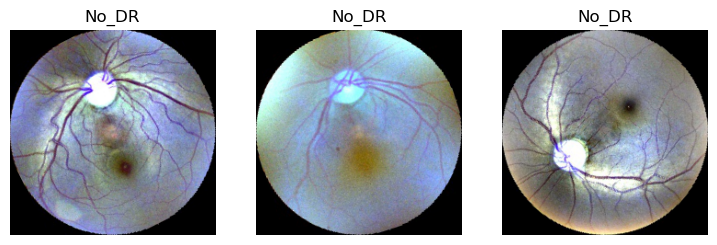

In [5]:
transforms = [
    FlipItem(p=0.5),
    Rotate(p=0.9, max_deg=90, pad_mode="zeros"),
]

dls = ImageDataLoaders.from_folder(
    DATA_DIR,
    valid_pct=0.1,
    seed=seed,
    item_tfms=Resize(IMG_SIZE),
    shuffle=True,
    batch_tfms=transforms,
    bs=BATCH_SIZE,
)
dls.show_batch(max_n=3)

In [6]:
learner = vision_learner(
    dls,
    base_model,
    metrics=[error_rate],
    pretrained=True,
    opt_func=Adam,
    loss_func=CrossEntropyLossFlat(),
)


# summary(learner, input_size=(3, IMG_SIZE, IMG_SIZE))

In [7]:
epochs = 10

learner.fit_one_cycle(epochs)

epoch,train_loss,valid_loss,error_rate,time
0,1.179065,0.898622,0.271795,55:42
1,0.730116,0.754374,0.238462,55:24
2,0.665321,0.661987,0.216524,58:24
3,0.683663,0.634326,0.212251,56:38
4,0.621743,0.621199,0.209117,57:04
5,0.618691,0.603157,0.199715,58:06
6,0.630437,0.604399,0.200570,1:13:52
7,0.592618,0.586629,0.192877,13:46:11


In [1]:
learner.predict(dls.valid_ds)

NameError: name 'learner' is not defined